In [21]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

from plotting import plot_utils, summary_plots, load_fits, plot_prf_params
plot_utils.set_all_font_sizes(20)
from utils import roi_utils, default_paths, stats_utils

from utils import prf_utils


In [18]:
subjects = np.arange(1,9)
n_subjects = len(subjects)

fitting_type1='gabor_solo_ridge_12ori_8sf'
fitting_type2 = 'gabor_solo_ridge_12ori_8sf_fit_pRFs'

out1 = [load_fits.load_fit_results(ss,fitting_type1, n_from_end=0, verbose=False) \
        for ss in subjects];

out2  = [load_fits.load_fit_results(ss, fitting_type2, n_from_end=0, verbose=False) \
         for ss in subjects];

fig_save_folder=None

roi_def = roi_utils.multi_subject_roi_def(subjects)
roi_names =roi_def.roi_names
n_rois = len(roi_names)

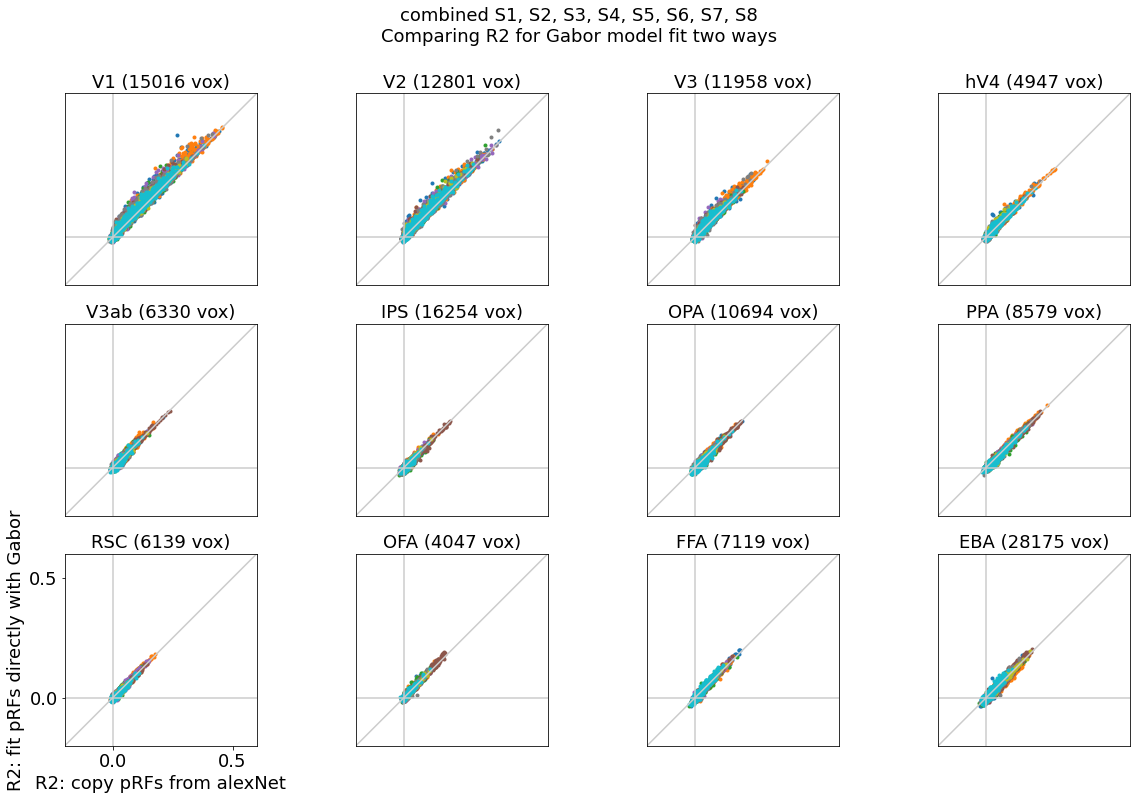

In [19]:
n_vox_each = np.array([o['val_r2'].shape[0] for o in out1])
subject_inds = np.repeat(np.arange(n_subjects), n_vox_each)

plot_utils.set_all_font_sizes(fs = 18)

val_rsq1 = np.concatenate([out1[si]['val_r2'][:,0:1] for si in range(n_subjects)], axis=0)
val_rsq2 = np.concatenate([out2[si]['val_r2'][:,0:1] for si in range(n_subjects)], axis=0)

dat = np.concatenate((val_rsq1,val_rsq2), axis=1)

inds2use = np.ones([len(val_rsq1),])==1

fitting_type1 = 'copy pRFs from alexNet'
fitting_type2 = 'fit pRFs directly with Gabor'

sp = plot_utils.scatter_plot(color=None, xlabel='R2: %s'%fitting_type1, \
                             ylabel='R2: %s'%fitting_type2, \
                             xlims=[-0.2, 0.6], ylims=[-0.2, 0.6], \
                  xticks=[0, 0.5], yticks=[0, 0.5],\
                  show_diagonal=True, show_axes=True);

plot_utils.create_roi_subplots(dat, inds2use, sp, subject_inds=subject_inds,\
                    suptitle='%s\nComparing R2 for Gabor model fit two ways'%\
                               (summary_plots.get_substr(out1)), \
                   label_just_corner=True, figsize=(20,12),roi_def=roi_def)


In [28]:
# Going to plot R2 difference versus pRF params

n_vox_each = np.array([o['val_r2'].shape[0] for o in out1])
subject_inds = np.repeat(np.arange(n_subjects), n_vox_each)

val_rsq1 = np.concatenate([out1[si]['val_r2'][:,0:1] for si in range(n_subjects)], axis=0)
val_rsq2 = np.concatenate([out2[si]['val_r2'][:,0:1] for si in range(n_subjects)], axis=0)
diff = val_rsq2 - val_rsq1

inds2use = np.ones([len(val_rsq1),])==1

fitting_type1 = 'copy pRFs from alexNet'
fitting_type2 = 'fit pRFs directly with Gabor'


prf_pars = np.concatenate([out2[si]['best_params'][0][:,0,:] for si in range(n_subjects)], axis=0)
x = prf_pars[:,0]
y = prf_pars[:,1]

screen_eccen_deg = 8.4
angle_fwrf, eccen_fwrf = prf_utils.cart_to_pol(x*screen_eccen_deg,y*screen_eccen_deg)
sigma = prf_pars[:,2]
size_fwrf = sigma * screen_eccen_deg

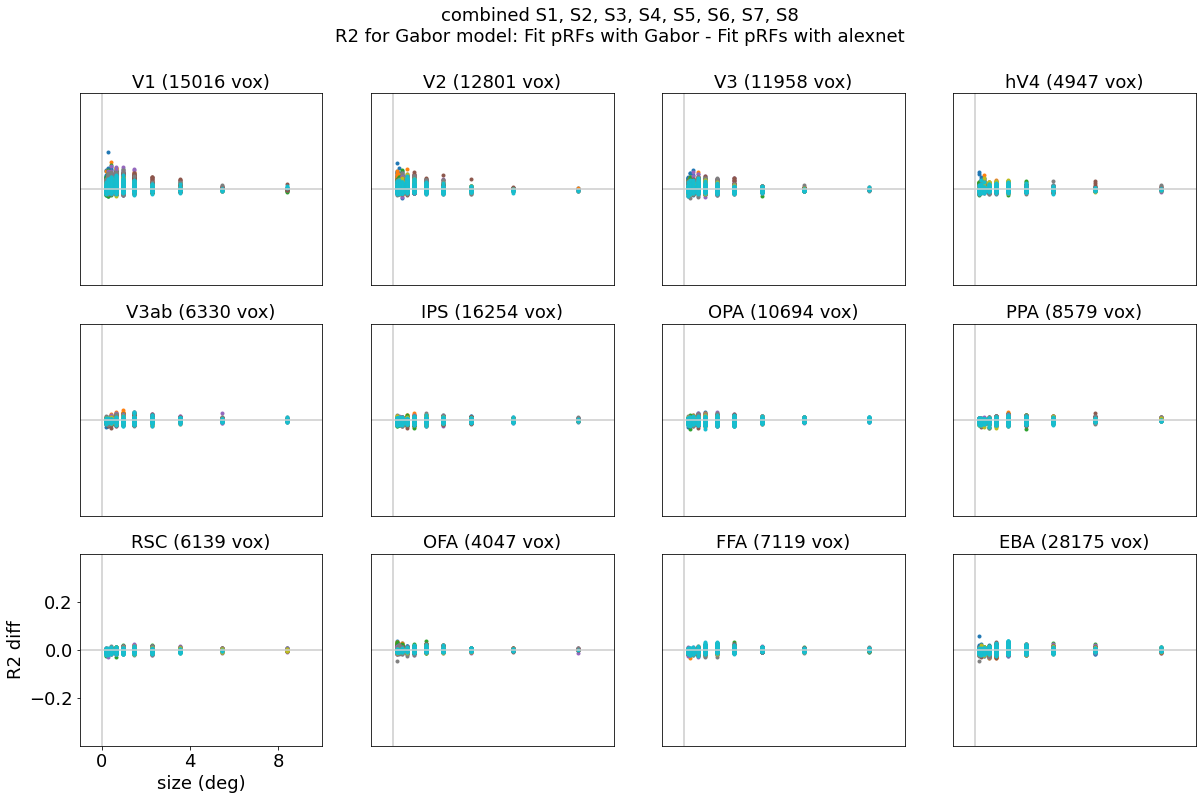

In [ ]:
dat = np.concatenate((size_fwrf[:,np.newaxis],diff), axis=1)

plot_utils.set_all_font_sizes(fs = 18)
sp = plot_utils.scatter_plot(color=None, xlabel='size (deg)', \
                             ylabel='R2 diff', \
                             xlims=[-1,10], ylims=[-0.4, 0.4], \
                  xticks=[0, 4, 8], yticks=[-0.2, 0, 0.2],\
                  show_diagonal=False, show_axes=True, square=False);

plot_utils.create_roi_subplots(dat, inds2use, sp, subject_inds=subject_inds,\
                    suptitle='%s\nR2 for Gabor model: Fit pRFs with Gabor - Fit pRFs with alexnet'%\
                               (summary_plots.get_substr(out1)), \
                   label_just_corner=True, figsize=(20,12),roi_def=roi_def)

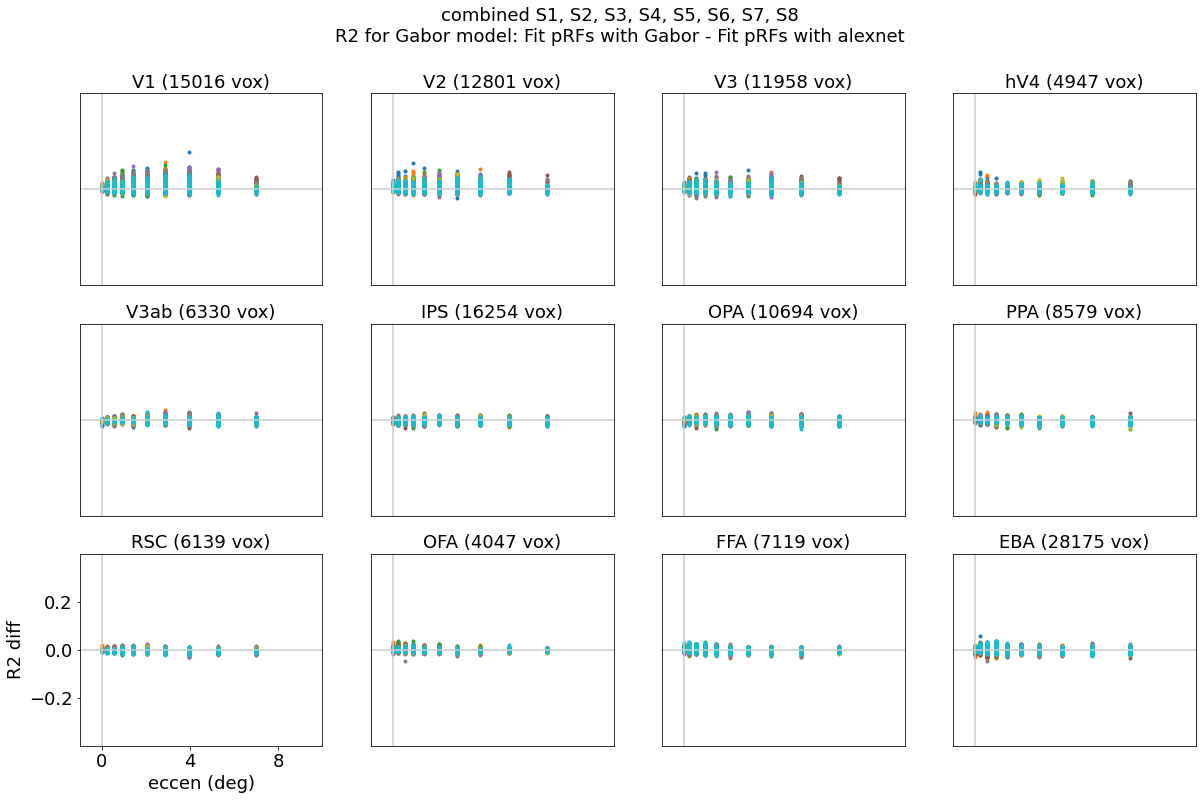

In [33]:
dat = np.concatenate((eccen_fwrf[:,np.newaxis],diff), axis=1)

plot_utils.set_all_font_sizes(fs = 18)
sp = plot_utils.scatter_plot(color=None, xlabel='eccen (deg)', \
                             ylabel='R2 diff', \
                             xlims=[-1,10], ylims=[-0.4, 0.4], \
                  xticks=[0, 4, 8], yticks=[-0.2, 0, 0.2],\
                  show_diagonal=False, show_axes=True, square=False);

plot_utils.create_roi_subplots(dat, inds2use, sp, subject_inds=subject_inds,\
                    suptitle='%s\nR2 for Gabor model: Fit pRFs with Gabor - Fit pRFs with alexnet'%\
                               (summary_plots.get_substr(out1)), \
                   label_just_corner=True, figsize=(20,12),roi_def=roi_def)

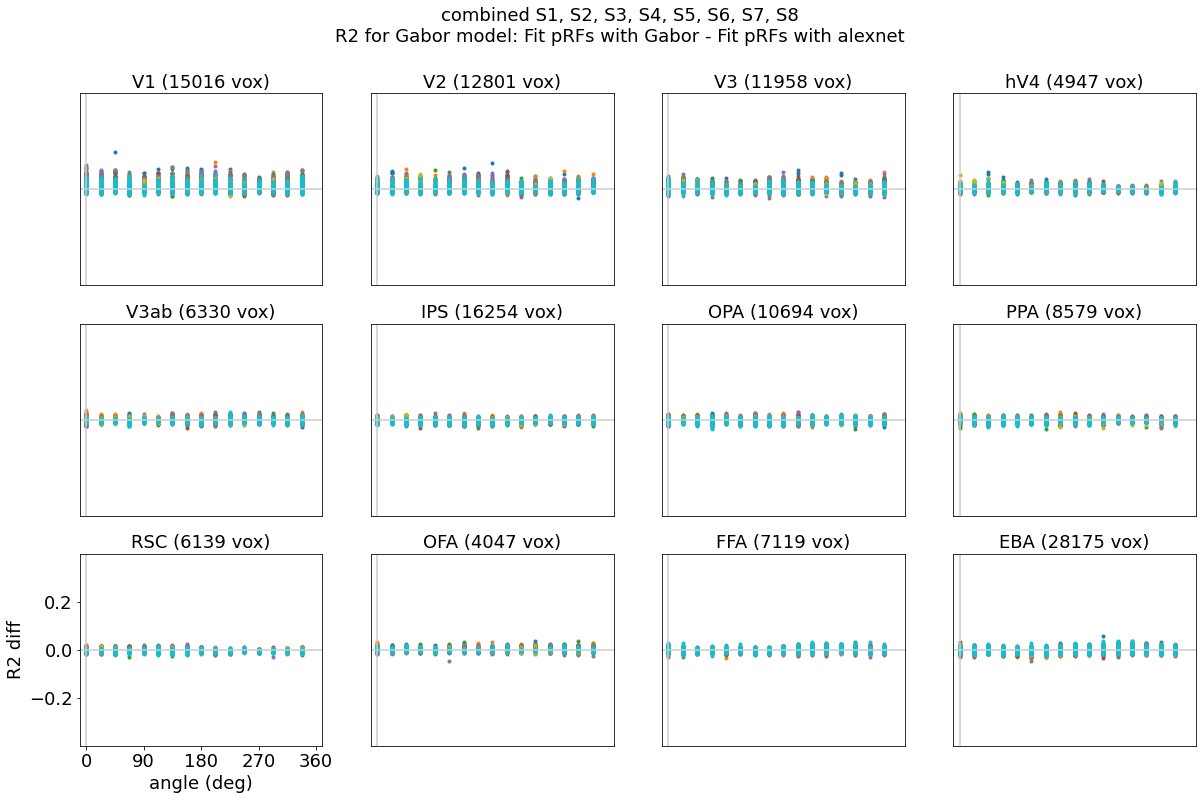

In [34]:
dat = np.concatenate((angle_fwrf[:,np.newaxis],diff), axis=1)

plot_utils.set_all_font_sizes(fs = 18)
sp = plot_utils.scatter_plot(color=None, xlabel='angle (deg)', \
                             ylabel='R2 diff', \
                             xlims=[-10,370], ylims=[-0.4, 0.4], \
                  xticks=[0,90,180,270,360], yticks=[-0.2, 0, 0.2],\
                  show_diagonal=False, show_axes=True, square=False);

plot_utils.create_roi_subplots(dat, inds2use, sp, subject_inds=subject_inds,\
                    suptitle='%s\nR2 for Gabor model: Fit pRFs with Gabor - Fit pRFs with alexnet'%\
                               (summary_plots.get_substr(out1)), \
                   label_just_corner=True, figsize=(20,12),roi_def=roi_def)

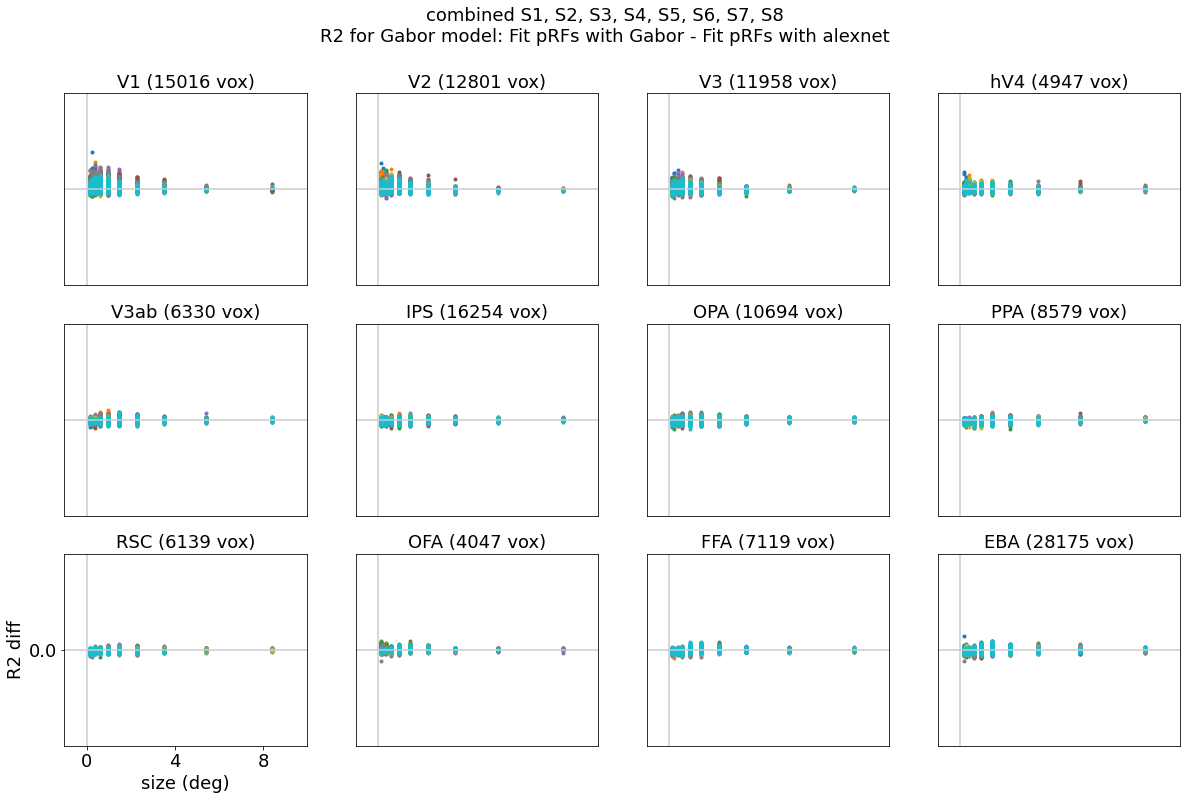

In [ ]:
n_vox_each = np.array([o['val_r2'].shape[0] for o in out1])
subject_inds = np.repeat(np.arange(n_subjects), n_vox_each)

plot_utils.set_all_font_sizes(fs = 18)

val_rsq1 = np.concatenate([out1[si]['val_r2'][:,0:1] for si in range(n_subjects)], axis=0)
val_rsq2 = np.concatenate([out2[si]['val_r2'][:,0:1] for si in range(n_subjects)], axis=0)
diff = val_rsq2 - val_rsq1

prf_pars = np.concatenate([out2[si]['best_params'][0][:,0,:] for si in range(n_subjects)], axis=0)
x = prf_pars[:,0]
y = prf_pars[:,1]

screen_eccen_deg = 8.4
angle_fwrf, eccen_fwrf = prf_utils.cart_to_pol(x*screen_eccen_deg,y*screen_eccen_deg)
sigma = prf_pars[:,2]
size_fwrf = sigma * screen_eccen_deg

dat = np.concatenate((size_fwrf[:,np.newaxis],diff), axis=1)

inds2use = np.ones([len(val_rsq1),])==1

fitting_type1 = 'copy pRFs from alexNet'
fitting_type2 = 'fit pRFs directly with Gabor'

sp = plot_utils.scatter_plot(color=None, xlabel='size (deg)', \
                             ylabel='R2 diff', \
                             xlims=[-1,10], ylims=[-0.4, 0.4], \
                  xticks=[0, 4, 8], yticks=[0, 0.5],\
                  show_diagonal=False, show_axes=True, square=False);

plot_utils.create_roi_subplots(dat, inds2use, sp, subject_inds=subject_inds,\
                    suptitle='%s\nR2 for Gabor model: Fit pRFs with Gabor - Fit pRFs with alexnet'%\
                               (summary_plots.get_substr(out1)), \
                   label_just_corner=True, figsize=(20,12),roi_def=roi_def)
